# Loan Risk Detection Analysis - Finance Data

## Problem Statement

Our work proposes two main methodology, one is a tableau report which provides in detail data analysis on difference of people who are Default(Charged Off) and potential good loan(Current).
Another is a Machine Learning model that predicts defaulters which would aid the financial industry to prevent financial loss.

![Image Description](loan.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('Case_Data.csv')
df.sample(5)

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
131312,NaN,60326475,64303227,17000,17000,60 months,7.89,343.81,A,A5,Manager,4 years,RENT,40000.0,Not Verified,15-Sep,Current,credit_card,Credit card refinancing,16.25,0,Dec-96,0,NaN,12,0,16530,33.3,20,w,16299.31,1023.98,700.69,323.29,0.0,0.0,0.0,15-Dec,343.81,16-Feb,16-Jan,0,NaN,INDIVIDUAL,NaN,NaN,0,0,19645,49700,NaN,NaN,NaN
107809,NaN,61401622,65520422,15000,15000,36 months,10.99,491.01,B,B4,electrician,10+ years,MORTGAGE,90000.0,Verified,15-Oct,Current,home_improvement,Home improvement,10.40,0,Sep-96,0,49.0,5,0,5676,96.2,15,w,14289.49,963.70,710.51,253.19,0.0,0.0,0.0,15-Dec,491.01,16-Feb,16-Jan,0,70.0,INDIVIDUAL,NaN,NaN,0,0,446851,5900,NaN,NaN,NaN
192144,NaN,55564640,59166382,19000,19000,60 months,9.99,403.61,B,B3,Manager,6 years,MORTGAGE,90000.0,Not Verified,15-Jul,Current,debt_consolidation,Debt consolidation,18.27,0,1-Mar,0,35.0,16,0,41828,53.2,46,w,17752.22,2007.51,1247.78,759.73,0.0,0.0,0.0,16-Jan,403.61,16-Feb,16-Jan,0,NaN,INDIVIDUAL,NaN,NaN,0,0,65473,78600,NaN,NaN,NaN
117664,NaN,60914218,64956060,15000,15000,60 months,12.69,338.93,C,C2,Aircraft engine mechanic,10+ years,MORTGAGE,55000.0,Not Verified,15-Oct,Current,debt_consolidation,Debt consolidation,17.30,0,Oct-97,1,NaN,11,0,13121,51.3,26,w,14453.34,995.64,546.66,448.98,0.0,0.0,0.0,16-Jan,338.93,16-Feb,16-Jan,0,NaN,INDIVIDUAL,NaN,NaN,0,0,262545,25600,NaN,NaN,NaN
114617,NaN,61348629,65467353,7000,7000,36 months,12.29,233.48,C,C1,Social Service Case Manager,10+ years,OWN,30000.0,Verified,15-Oct,Current,debt_consolidation,Debt consolidation,10.80,0,1-Feb,1,32.0,10,0,7022,86.7,21,w,6509.65,695.66,490.35,205.31,0.0,0.0,0.0,16-Jan,233.48,16-Feb,16-Jan,0,32.0,INDIVIDUAL,NaN,NaN,0,514,58179,8100,NaN,NaN,NaN


In [3]:
df.shape

(212999, 53)

In [4]:
df.drop(['Row ID','Unnamed: 50','36months','60months'], axis=1, inplace=True)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,15-Sep,Charged Off,debt_consolidation,Debt consolidation,20.72,0,Sep-00,1,NaN,25,0,31578,77.0,42,w,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,16-Jan,0,NaN,INDIVIDUAL,NaN,NaN,0,0,52303,41000
1,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,15-Sep,Charged Off,debt_consolidation,Debt consolidation,24.57,0,2-Sep,0,36.0,13,1,5084,38.8,41,w,0.0,10043.49,9942.67,100.81,0.0,0.0,0.0,15-Oct,10059.00,NaN,16-Jan,0,79.0,INDIVIDUAL,NaN,NaN,0,332,175731,13100
2,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,15-Sep,Charged Off,debt_consolidation,Debt consolidation,32.41,0,6-Feb,1,NaN,18,0,12070,74.0,36,f,0.0,221.96,167.56,54.40,0.0,0.0,0.0,15-Oct,225.84,NaN,16-Jan,0,NaN,INDIVIDUAL,NaN,NaN,0,0,202012,16300
3,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,Source Verified,15-Sep,Charged Off,credit_card,Credit card refinancing,30.98,0,Oct-99,2,NaN,18,0,22950,66.0,41,f,0.0,315.13,235.76,79.37,0.0,0.0,0.0,15-Oct,327.34,NaN,16-Jan,0,NaN,INDIVIDUAL,NaN,NaN,0,0,108235,34750
4,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,Verified,15-Sep,Charged Off,debt_consolidation,Debt consolidation,32.54,0,Nov-99,3,69.0,9,0,4172,29.6,26,w,0.0,333.66,195.78,137.88,0.0,0.0,0.0,15-Oct,354.87,NaN,16-Jan,0,69.0,INDIVIDUAL,NaN,NaN,0,0,45492,14100


In [6]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       12790
emp_length                      12767
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
title                              15
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         103371
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util  

In [7]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
purpose                         object
title                           object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                

### **Dropping Columns**

- 'id' and 'member_id' was droped because it was unique for each row and hence not useful for analysis
- 'mths_since_last_major_derog' was dropped because it had more than 50% of the data missing
- 'annual_inc_joint' and 'dti_joint' were dropped because they had more than 90% of the data missing
- 'emp_title' was dropped because it had too many unique values
- 'issue_d' was dropped because it was the date of loan issue and that too of 2015 only and hence not useful for analysis
- 'last_credit_pull_d' was dropped because it was the date of last credit pull and that too of 2016 only and hence not useful for analysis
- 'last_pymnt_d' was dropped because it was the date of last payment and that too of 2015-2016 only and hence not useful for analysis
- 'next_pymnt_d' was dropped because it was the date of next payment and hence not useful for analysis

In [8]:
df.drop(['id','member_id', 'mths_since_last_major_derog', 
         'annual_inc_joint', 'dti_joint', 'issue_d', 'last_credit_pull_d', 
         'last_pymnt_d', 'next_pymnt_d','emp_title'], axis=1, inplace=True)

- Extracted digits from 'term' column and converted it to int
- Extracted year from 'earliest_cr_line' column and converted it to int
- Extracted experience years from 'emp_length' column and converted it to int

In [9]:
df['term'] = df['term'].str.replace('months','').astype(int)
df['emp_length']=df['emp_length'].str.split(' ', expand=True)[0].str.replace('+','').str.replace('<','1').fillna(0).astype(int)

In [10]:
earliest_cr_line = lambda x: next((i for i in x.split('-') if i.isdigit()), None)

In [11]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(earliest_cr_line).astype(int)

In [12]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,20000,36,12.29,667.06,C,C1,1,OWN,65000.0,Source Verified,Charged Off,debt_consolidation,Debt consolidation,20.72,0,0,1,NaN,25,0,31578,77.0,42,w,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0,INDIVIDUAL,0,0,52303,41000
1,11000,11000,36,12.69,369.00,C,C2,7,MORTGAGE,40000.0,Source Verified,Charged Off,debt_consolidation,Debt consolidation,24.57,0,2,0,36.0,13,1,5084,38.8,41,w,0.0,10043.49,9942.67,100.81,0.0,0.0,0.0,10059.00,0,INDIVIDUAL,0,332,175731,13100
2,7000,7000,36,9.99,225.84,B,B3,6,MORTGAGE,32000.0,Source Verified,Charged Off,debt_consolidation,Debt consolidation,32.41,0,6,1,NaN,18,0,12070,74.0,36,f,0.0,221.96,167.56,54.40,0.0,0.0,0.0,225.84,0,INDIVIDUAL,0,0,202012,16300
3,10000,10000,36,10.99,327.34,B,B4,10,MORTGAGE,48000.0,Source Verified,Charged Off,credit_card,Credit card refinancing,30.98,0,99,2,NaN,18,0,22950,66.0,41,f,0.0,315.13,235.76,79.37,0.0,0.0,0.0,327.34,0,INDIVIDUAL,0,0,108235,34750
4,9550,9550,36,19.99,354.87,E,E4,0,RENT,32376.0,Verified,Charged Off,debt_consolidation,Debt consolidation,32.54,0,99,3,69.0,9,0,4172,29.6,26,w,0.0,333.66,195.78,137.88,0.0,0.0,0.0,354.87,0,INDIVIDUAL,0,0,45492,14100


In [13]:
df.shape

(212999, 39)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   212999 non-null  int64  
 1   funded_amnt                 212999 non-null  int64  
 2   term                        212999 non-null  int32  
 3   int_rate                    212999 non-null  float64
 4   installment                 212999 non-null  float64
 5   grade                       212999 non-null  object 
 6   sub_grade                   212999 non-null  object 
 7   emp_length                  212999 non-null  int32  
 8   home_ownership              212999 non-null  object 
 9   annual_inc                  212999 non-null  float64
 10  verification_status         212999 non-null  object 
 11  loan_status                 212999 non-null  object 
 12  purpose                     212999 non-null  object 
 13  title         

### **Converted all the objects to category using Label Encoder**
- Chose label encoder because few of the columns had more than 3 categories and hence one hot encoding would have increased the number of columns

In [15]:
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'])
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['purpose'] = le.fit_transform(df['purpose'])
df = df.dropna(subset=['title'])
df['title'] = le.fit_transform(df['title'])
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
df['application_type'] = le.fit_transform(df['application_type'])
df['term'] = le.fit_transform(df['term'])

In [16]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,20000,0,12.29,667.06,2,10,1,2,65000.0,1,0,2,3,20.72,0,0,1,NaN,25,0,31578,77.0,42,1,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0,0,0,0,52303,41000
1,11000,11000,0,12.69,369.00,2,11,7,1,40000.0,1,0,2,3,24.57,0,2,0,36.0,13,1,5084,38.8,41,1,0.0,10043.49,9942.67,100.81,0.0,0.0,0.0,10059.00,0,0,0,332,175731,13100
2,7000,7000,0,9.99,225.84,1,7,6,1,32000.0,1,0,2,3,32.41,0,6,1,NaN,18,0,12070,74.0,36,0,0.0,221.96,167.56,54.40,0.0,0.0,0.0,225.84,0,0,0,0,202012,16300
3,10000,10000,0,10.99,327.34,1,8,10,1,48000.0,1,0,1,2,30.98,0,99,2,NaN,18,0,22950,66.0,41,0,0.0,315.13,235.76,79.37,0.0,0.0,0.0,327.34,0,0,0,0,108235,34750
4,9550,9550,0,19.99,354.87,4,23,0,3,32376.0,2,0,2,3,32.54,0,99,3,69.0,9,0,4172,29.6,26,1,0.0,333.66,195.78,137.88,0.0,0.0,0.0,354.87,0,0,0,0,45492,14100


### **For my personal analysis**
- The data also includes, assessing the creditworthness and verifying the income, employment, and assets.
- Purpose of the loan and the amount of the collateral is also considered.
- Once loan is approved, the lender sets the term of the loan, including the interest rate and repayment schedule.
- ML can be used to learn to identify the patterns that predict the liklihood of loan default and also help in evaluating the creditworthiness of the borowwer.

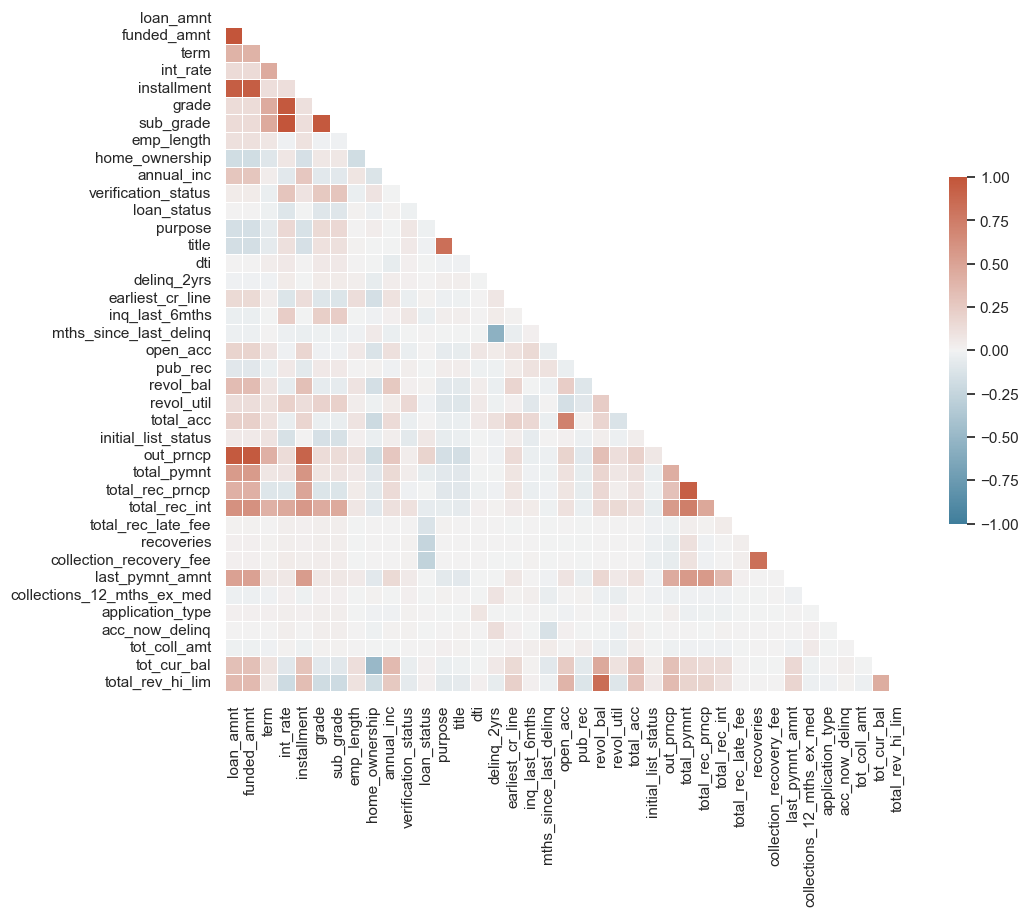

In [17]:
sns.set_theme(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, 
            vmin=-1, square=True, linewidths=0.5, cbar_kws={'shrink':0.5})

plt.show()

### **We can deduce from the above headmap that there are few high co-relation between the features**
- Calculating the mean and medain helps in understanding the distribution of the data. It also helps in understanding the outliers in the data.
- Moreover, if the mean and median are close to each other, then the data is normally distributed. If the mean is greater than the median, then the data is right skewed and if the mean is less than the median, then the data is left skewed.
- **We can see that the mean and median are close to each other. Hence, we can say that the data is normally distributed and the null values can be replaced by the mean.**

In [18]:
print(df.mths_since_last_delinq.mean())
print(df.mths_since_last_delinq.median())

34.16904003867943
31.0


In [19]:
print(df.revol_util.mean())
print(df.revol_util.median())

53.343584637133795
53.5


In [20]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mean(), inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

### **Performed univariate feature selection methods**
- Chi-Square test works only for categorical features
- ANOVA test works only for continuous features
- Therefore we have to perform chi-square test on categorical features and ANOVA test on continuous features

In [21]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [22]:
# ANOVA test for continuous features

X = df.drop(['loan_status','term','grade','sub_grade',
             'emp_length','home_ownership','verification_status','purpose',
             'title','application_type','initial_list_status'], axis=1)

y = df['loan_status']

bestfeatures = SelectKBest(f_classif, k=25)
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Specs', 'Score']  # naming the dataframe columns

print(feature_scores.nlargest(25, 'Score'))  # print 25 best features

                         Specs         Score
21     collection_recovery_fee  17044.980745
20                  recoveries  14043.197919
15                   out_prncp   8429.062384
19          total_rec_late_fee   3666.252728
2                     int_rate   2362.106596
18               total_rec_int    753.724660
16                 total_pymnt    594.960135
8               inq_last_6mths    238.467732
26                 tot_cur_bal     89.461511
27            total_rev_hi_lim     82.579964
13                  revol_util     45.131219
7             earliest_cr_line     31.015608
4                   annual_inc     24.129437
12                   revol_bal     17.215343
10                    open_acc      9.588235
5                          dti      9.411058
22             last_pymnt_amnt      6.929968
3                  installment      6.836520
24              acc_now_delinq      3.687389
25                tot_coll_amt      1.549770
14                   total_acc      0.973814
23  collec

In [23]:
# Chi-square test for categorical features

X = df[['term','grade','sub_grade','emp_length',
        'home_ownership','verification_status','purpose',
        'title','application_type','initial_list_status']]

y = df['loan_status']

bestfeatures = SelectKBest(chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  # print 10 best features

                 Specs        Score
2            sub_grade  8153.390790
1                grade  1918.354441
9  initial_list_status   312.776809
6              purpose   132.263582
3           emp_length   103.578306
4       home_ownership    74.050944
0                 term    60.956257
5  verification_status    53.725179
7                title    41.025781
8     application_type     5.804263


### **After performing univariate feature selection methods, we can deduce which features to select along with features that is important when giving a loan.**

In [24]:
df = df[['int_rate','installment','home_ownership',
         'annual_inc','verification_status','title','pub_rec',
         'total_acc','sub_grade','loan_status','grade',
         'initial_list_status','purpose','emp_length','application_type']]

df.head()

,int_rate,installment,home_ownership,annual_inc,verification_status,title,pub_rec,total_acc,sub_grade,loan_status,grade,initial_list_status,purpose,emp_length,application_type
0,12.29,667.06,2,65000.0,1,3,0,42,10,0,2,1,2,1,0
1,12.69,369.00,1,40000.0,1,3,1,41,11,0,2,1,2,7,0
2,9.99,225.84,1,32000.0,1,3,0,36,7,0,1,0,2,6,0
3,10.99,327.34,1,48000.0,1,2,0,41,8,0,1,0,1,10,0
4,19.99,354.87,3,32376.0,2,3,0,26,23,0,4,1,2,0,0


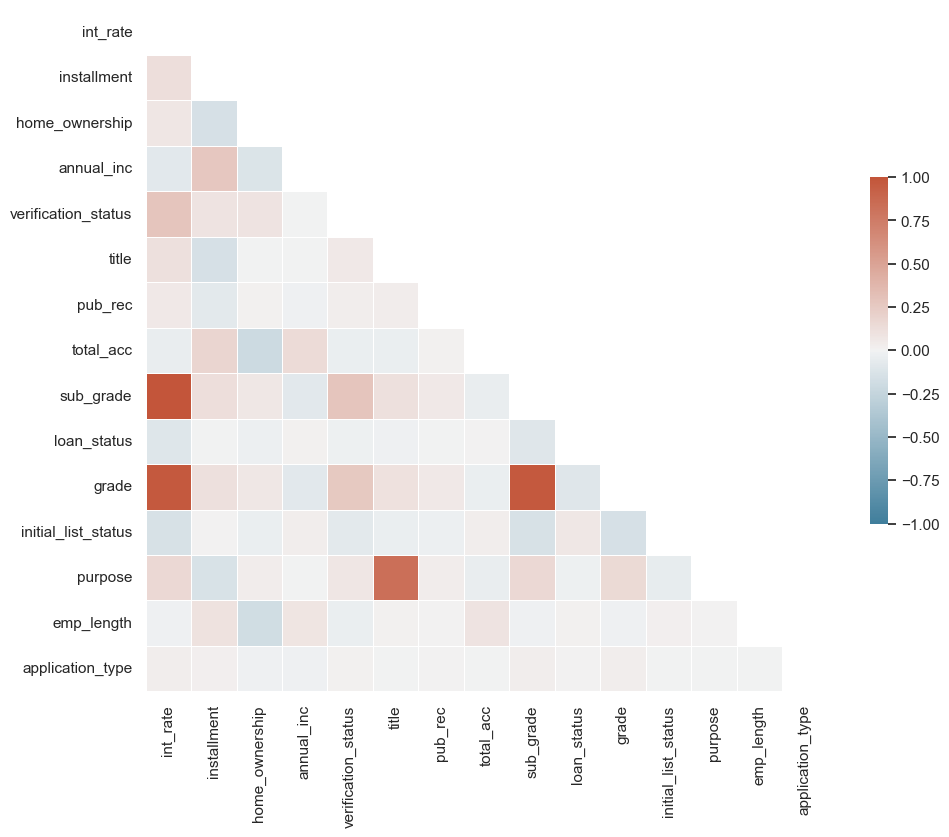

In [25]:
sns.set_theme(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, 
            vmin=-1, square=True, linewidths=0.5, cbar_kws={'shrink':0.5})

plt.show()

### **Co-relation still exists between the features after performing so we drop a few features based on the co-relation**
- 'Grade' was dropped because it was highly co-related with 'sub_grade' and 'sub_grade' basically represents the 'grade' but more detailed.
- One more reason to keep 'sub_grade' is that it has more categories and the score was higher for 'sub_grade' than 'grade'.
- 'int_rate' was dropped because it was highly co-related with 'sub_grade'
- 'title' was dropped because it was highly co-related with 'purpose'

In [26]:
df.drop(['grade','int_rate','title'], axis=1, inplace=True)

### Imbalanced Data
- 0 is 'Charged Off' and 1 is 'Current'
- We can see that the data is imbalanced. There are more 'Current' loans than 'Charged Off' loans.
- We can use SMOTE to balance the data by generating synthetic data.


In [27]:
df.shape

(212984, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212984 entries, 0 to 212998
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   installment          212984 non-null  float64
 1   home_ownership       212984 non-null  int32  
 2   annual_inc           212984 non-null  float64
 3   verification_status  212984 non-null  int32  
 4   pub_rec              212984 non-null  int64  
 5   total_acc            212984 non-null  int64  
 6   sub_grade            212984 non-null  int32  
 7   loan_status          212984 non-null  int32  
 8   initial_list_status  212984 non-null  int32  
 9   purpose              212984 non-null  int32  
 10  emp_length           212984 non-null  int32  
 11  application_type     212984 non-null  int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 14.6 MB


In [29]:
df.head()

,installment,home_ownership,annual_inc,verification_status,pub_rec,total_acc,sub_grade,loan_status,initial_list_status,purpose,emp_length,application_type
0,667.06,2,65000.0,1,0,42,10,0,1,2,1,0
1,369.00,1,40000.0,1,1,41,11,0,1,2,7,0
2,225.84,1,32000.0,1,0,36,7,0,0,2,6,0
3,327.34,1,48000.0,1,0,41,8,0,0,1,10,0
4,354.87,3,32376.0,2,0,26,23,0,1,2,0,0


In [30]:
df['loan_status'].value_counts()

1    210211
0      2773
Name: loan_status, dtype: int64

In [31]:
df[df['loan_status']==0].sample(10)

,installment,home_ownership,annual_inc,verification_status,pub_rec,total_acc,sub_grade,loan_status,initial_list_status,purpose,emp_length,application_type
2662,632.93,3,77000.0,1,0,45,5,0,0,2,7,0
1805,646.61,1,49600.0,1,0,38,21,0,0,2,10,0
104,130.94,1,70000.0,0,0,17,8,0,0,3,10,0
386,516.23,3,42000.0,1,0,7,16,0,1,2,4,0
182,212.43,1,35000.0,0,0,36,7,0,1,1,5,0
972,359.38,1,57000.0,0,0,30,18,0,0,2,9,0
630,530.58,3,51000.0,2,0,23,25,0,0,2,4,0
28,300.45,2,95000.0,1,1,11,22,0,0,2,1,0
2523,379.79,1,27000.0,1,0,13,25,0,1,2,6,0
967,701.08,1,55952.0,1,0,33,26,0,0,8,3,0


In [32]:
df_ChargedOff = df[df['loan_status']==0]
df_ChargedOff.shape

(2773, 12)

### Duplicating the 'Charged-Off' data

In [33]:
temp = pd.DataFrame()
for i in range(5):
    temp = pd.concat([temp, pd.concat([df_ChargedOff, df_ChargedOff])])

In [34]:
temp['loan_status'].value_counts()

0    27730
Name: loan_status, dtype: int64

In [35]:
df = pd.concat([df, temp])

In [36]:
df['loan_status'].value_counts()

1    210211
0     30503
Name: loan_status, dtype: int64

In [37]:
df.head()

,installment,home_ownership,annual_inc,verification_status,pub_rec,total_acc,sub_grade,loan_status,initial_list_status,purpose,emp_length,application_type
0,667.06,2,65000.0,1,0,42,10,0,1,2,1,0
1,369.00,1,40000.0,1,1,41,11,0,1,2,7,0
2,225.84,1,32000.0,1,0,36,7,0,0,2,6,0
3,327.34,1,48000.0,1,0,41,8,0,0,1,10,0
4,354.87,3,32376.0,2,0,26,23,0,1,2,0,0


### SMOTE
- Oversampling the minority class
- It works by creating synthetic samples from the minor class instead of creating copies

In [38]:
smote = SMOTE(sampling_strategy='not majority')

In [39]:
df_x = df.drop(['loan_status'], axis=1)

In [40]:
df_y = df['loan_status']

In [41]:
X_sm, Y_sm = smote.fit_resample(df_x, df_y)

In [42]:
Y_sm.value_counts()

0    210211
1    210211
Name: loan_status, dtype: int64

**Splliting the data into train and test**
- We have used 80% of the data for training and 20% of the data for testing

In [43]:
#  split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(336337, 11)
(84085, 11)


### Fitting the model
#### 1. Random Forest Classifier

In [45]:
# fit model on training data using RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# check the accuracy on training set and testing set

print('Accuracy on training set: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(rfc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 1.000


In [47]:
# classification report

y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41915
           1       1.00      1.00      1.00     42170

    accuracy                           1.00     84085
   macro avg       1.00      1.00      1.00     84085
weighted avg       1.00      1.00      1.00     84085



- **Precision:** The precision for both classes is 1.00, indicating that the classifier predicts all samples correctly for both non-risky (class 0) and risky loans (class 1).
- **Recall:** The recall for both classes is 1.00, meaning that the classifier identifies all instances of both non-risky and risky loans.
- **F1-Score:** The F1-score for both classes is 1.00, which indicates a perfect balance between precision and recall for both classes.
- **Accuracy**: The overall accuracy of the Random Forest classifier is 1.00, indicating that it correctly predicts all loan samples.

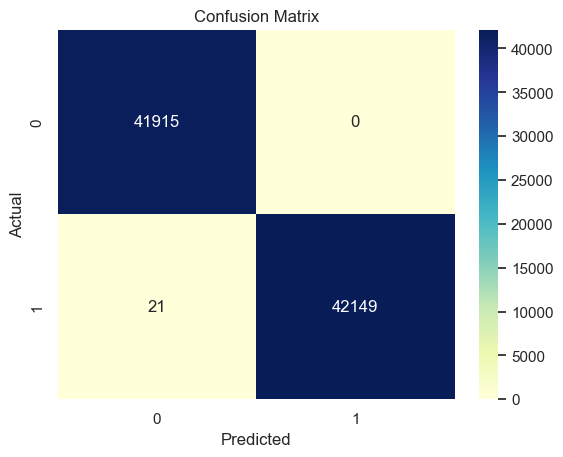

In [48]:
# confusion matrix graphical representation

cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2. XGBoost Classifier

In [49]:
# fit model on training data using XGboost Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
# check the accuracy on training set and testing set

print('Accuracy on training set: {:.3f}'.format(xgb.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(xgb.score(X_test, y_test)))

Accuracy on training set: 0.870
Accuracy on testing set: 0.865


In [51]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     41915
           1       0.90      0.83      0.86     42170

    accuracy                           0.87     84085
   macro avg       0.87      0.87      0.86     84085
weighted avg       0.87      0.87      0.86     84085



- **Precision:** The precision for class 0 (non-risky loans) is 0.84, while for class 1 (risky loans) it is 0.89. This indicates that the classifier has a high percentage of true positive predictions for both classes, but slightly higher for class 1.
- **Recall:** The recall for class 0 is 0.90, indicating that the classifier correctly identifies 90% of the non-risky loans. The recall for class 1 is 0.83, indicating that the classifier identifies 83% of the risky loans.
- **F1-Score:** The F1-score is a balanced metric that considers both precision and recall. The F1-score for class 0 is 0.87, and for class 1, it is 0.86. These scores suggest a relatively balanced performance in terms of precision and recall for both classes.
- **Accuracy:** The overall accuracy of the XGBoost classifier is 0.86, indicating that it correctly predicts 86% of the loan samples.

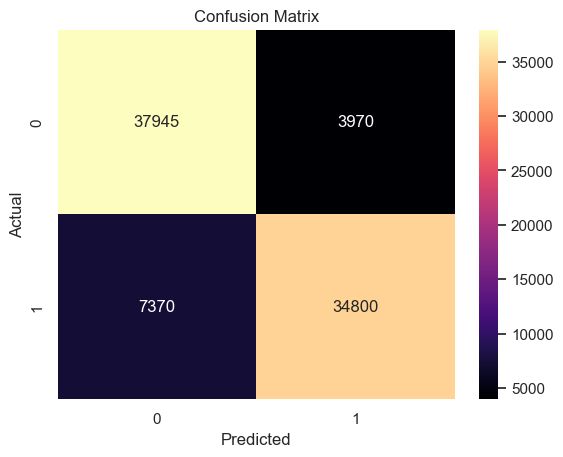

In [52]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Best model based on performance:
- Based on the above results, both classifiers demonstrate excellent performance with high precision, recall, and F1-scores. However, it is worth noting that the Random Forest classifier achieves perfect accuracy and F1-scores for both classes, suggesting it may be overfitting the data.

- Considering the trade-off between accuracy and generalization ability, the **`XGBoost Classifier`** appears to be the better choice for the loan risk detection. It offers a good balance between performance on the training and testing sets, avoids the risk of overfitting, and provides a more realistic estimate of the model's performance on unseen data.

## Insights:

- Overall correctness in classifying non-risky and risky loans can be seen using **Accuracy** of approximately **86.96%**.
- There is a high proportion of risky loans among the predicted positives shown by **Precision** of around **89.17%**.
- We capture a significant portion of actual risky loans among the positives by a **Recall** of approximately **82.82%**.
- There seems moderate misclassifications of non-risky and risky loans pointed by **False Positive Rate (FPR)** of **10.18%** and **False Negative Rate (FNR)** of **17.18%** respectively.


- By gaining additional information from the financial lending institutions about the risk tolerance, cost considerations for false positives and false negatives, and specific business requirements would be necessary. These factors would help determine the optimal balance between precision and recall and inform any necessary adjustments or improvements to the model.